## Fraud Detection Case Study



## **1.0 Data Understanding**

### **1.1 Import Libraries**

In [205]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

### **1.2 Load the Data**

In [206]:
Train_df = pd.read_csv('fraudTrain.csv')
Test_df = pd.read_csv('fraudTest.csv')

In [207]:
# Understanding feature names, data types and null values for both tain and test data 
print("*************** Train Data ****************\n")
print(Train_df.info())
print("*************** Test Data ****************\n")
print(Test_df.info())

*************** Train Data ****************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296

### **1.3 Analyze data**

In [208]:
#Checking if all featutes in Train and Test data have same data types
for cols in Train_df.columns:
    if Test_df.columns .__contains__(cols):
        if Train_df[cols].dtype != Test_df[cols].dtype:
            print(f"Column: {cols} has different data types in Train and Test data")
            print(f"Train Data Type: {Train_df[cols].dtype}")
            print(f"Test Data Type: {Test_df[cols].dtype}\n")
        else:
            print(f"Column: {cols} has same data types in Train and Test data")
    else:
        print(f"Column: {cols} is not present in Test data") 

Column: Unnamed: 0 has same data types in Train and Test data
Column: trans_date_trans_time has same data types in Train and Test data
Column: cc_num has same data types in Train and Test data
Column: merchant has same data types in Train and Test data
Column: category has same data types in Train and Test data
Column: amt has same data types in Train and Test data
Column: first has same data types in Train and Test data
Column: last has same data types in Train and Test data
Column: gender has same data types in Train and Test data
Column: street has same data types in Train and Test data
Column: city has same data types in Train and Test data
Column: state has same data types in Train and Test data
Column: zip has same data types in Train and Test data
Column: lat has same data types in Train and Test data
Column: long has same data types in Train and Test data
Column: city_pop has same data types in Train and Test data
Column: job has same data types in Train and Test data
Column: d

💡 All the features in both the training and test datasets are consistent in terms of names and data types. Additionally, there are no missing (null) values present in any of the columns. This ensures that the data is clean and ready for further analysis and modeling.

In [209]:
# Understanding the statistical summary of train data
print("*************** Train Data ****************")
Train_df.describe().T.style.background_gradient(cmap='Blues')

*************** Train Data ****************


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.000000,648337.000000,374317.974488,0.000000,324168.500000,648337.000000,972505.500000,1296674.000000
cc_num,1296675.000000,417192042079726656.000000,1308806447000789248.000000,60416207185.000000,180042946491150.000000,3521417320836166.000000,4642255475285942.000000,4992346398065154048.000000
amt,1296675.000000,70.351035,160.316039,1.000000,9.650000,47.520000,83.140000,28948.900000
zip,1296675.000000,48800.671097,26893.222476,1257.000000,26237.000000,48174.000000,72042.000000,99783.000000
lat,1296675.000000,38.537622,5.075808,20.027100,34.620500,39.354300,41.940400,66.693300
long,1296675.000000,-90.226335,13.759077,-165.672300,-96.798000,-87.476900,-80.158000,-67.950300
city_pop,1296675.000000,88824.440563,301956.360689,23.000000,743.000000,2456.000000,20328.000000,2906700.000000
unix_time,1296675.000000,1349243636.726123,12841278.423360,1325376018.000000,1338750742.500000,1349249747.000000,1359385375.500000,1371816817.000000
merch_lat,1296675.000000,38.537338,5.109788,19.027785,34.733572,39.365680,41.957164,67.510267
merch_long,1296675.000000,-90.226465,13.771091,-166.671242,-96.897276,-87.438392,-80.236796,-66.950902


In [210]:
# Understanding the statistical summary of test data
print("*************** Test Data ****************")
Test_df.describe().T.style.background_gradient(cmap='Blues')

*************** Test Data ****************


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.000000,277859.000000,160422.401459,0.000000,138929.500000,277859.000000,416788.500000,555718.000000
cc_num,555719.000000,417838695528764096.000000,1309836622980698624.000000,60416207185.000000,180042946491150.000000,3521417320836166.000000,4635330563105903.000000,4992346398065154048.000000
amt,555719.000000,69.392810,156.745941,1.000000,9.630000,47.290000,83.010000,22768.110000
zip,555719.000000,48842.628015,26855.283328,1257.000000,26292.000000,48174.000000,72011.000000,99921.000000
lat,555719.000000,38.543253,5.061336,20.027100,34.668900,39.371600,41.894800,65.689900
long,555719.000000,-90.231325,13.721780,-165.672300,-96.798000,-87.476900,-80.175200,-67.950300
city_pop,555719.000000,88221.887918,300390.892061,23.000000,741.000000,2408.000000,19685.000000,2906700.000000
unix_time,555719.000000,1380678865.166780,5201104.065916,1371816865.000000,1376028627.500000,1380761988.000000,1385866984.000000,1388534374.000000
merch_lat,555719.000000,38.542798,5.095829,19.027422,34.755302,39.376593,41.954163,66.679297
merch_long,555719.000000,-90.231380,13.733071,-166.671575,-96.905129,-87.445204,-80.264637,-66.952026


## **2.0 Data Cleaning & Feature Engineering for EDA**

#### **2.1 Dropping unwanted features**

In [211]:
# Droping unwanted features- Train Data
to_drop = ['Unnamed: 0', 'cc_num', 'street', 'zip','city_pop', 'trans_num', 'unix_time']
Train_df_drop= Train_df.drop(columns=to_drop)
# Droping unwanted features- Test Data
Test_df_drop= Test_df.drop(columns=to_drop)
# Checking the shape of both train and test data after dropping unwanted features
print("Train Data has",Train_df_drop.shape[0], "rows and", Train_df_drop.shape[1],"columns after dropping unwanted features\n")
print(Train_df_drop.columns)
print("\nTest Data has", Test_df_drop.shape[0], "rows and", Test_df_drop.shape[1], "columns after dropping unwanted features\n")
print(Test_df_drop.columns)

Train Data has 1296675 rows and 16 columns after dropping unwanted features

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'city', 'state', 'lat', 'long', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Test Data has 555719 rows and 16 columns after dropping unwanted features

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'city', 'state', 'lat', 'long', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


#### **2.2 Handling inconsistent values**

In [212]:
# Checking if all the values in merchant coloumn has prefix fraud
print("Count of unique values in merchant column of Train Data:", Train_df_drop['merchant'].nunique())
print("Total rows in Train Data:", len(Train_df_drop))
print("Count of unique values in merchant column of Test Data: ", Test_df_drop['merchant'].nunique()) 
print("Total rows in Test Data:", len(Test_df_drop))

Count of unique values in merchant column of Train Data: 693
Total rows in Train Data: 1296675
Count of unique values in merchant column of Test Data:  693
Total rows in Test Data: 555719


In [213]:
# Remove prefix fraud from each merchant name
Train_df_drop['merchant'] = Train_df_drop['merchant'].str.replace('fraud_', '', regex=False)
Test_df_drop['merchant'] = Test_df_drop['merchant'].str.replace('fraud_', '', regex=False) 

In [214]:
# Checking the unique values in merchant column after removing prefix fraud
print("Unique values in merchant column of Train Data: \n", Train_df_drop['merchant'].unique())
print("\n")
print("Unique values in merchant column of Test Data: \n", Test_df_drop['merchant'].unique())

Unique values in merchant column of Train Data: 
 ['Rippin, Kub and Mann' 'Heller, Gutmann and Zieme' 'Lind-Buckridge'
 'Kutch, Hermiston and Farrell' 'Keeling-Crist'
 'Stroman, Hudson and Erdman' 'Rowe-Vandervort' 'Corwin-Collins'
 'Herzog Ltd' 'Schoen, Kuphal and Nitzsche' 'Rutherford-Mertz'
 'Kerluke-Abshire' 'Lockman Ltd' 'Kiehn Inc' 'Beier-Hyatt'
 'Schmidt and Sons' 'Lebsack and Sons' 'Mayert Group'
 'Konopelski, Schneider and Hartmann' 'Schultz, Simonis and Little'
 'Bauch-Raynor' 'Harris Inc' 'Kling-Grant' 'Pacocha-Bauch' 'Lesch Ltd'
 'Kunde-Sanford' "Deckow-O'Conner" 'Bruen-Yost' 'Kunze Inc'
 'Nitzsche, Kessler and Wolff' 'Kihn, Abernathy and Douglas'
 'Torphy-Goyette' 'Balistreri-Nader' 'Bahringer, Schoen and Corkery'
 'Hudson-Ratke' 'Heidenreich PLC' 'Halvorson Group' 'Harber Inc'
 'Mosciski, Gislason and Mertz' 'Christiansen, Goyette and Schamberger'
 'Howe Ltd' 'Ledner-Pfannerstill' 'Koepp-Witting' 'Doyle Ltd'
 'Schaefer, Maggio and Daugherty' 'Stracke-Lemke'
 'Mosciski, Zi

#### **2.3 New column Extraction- Feature Engineering**

In [215]:
# creating new columns: trans_date and trans_time from trans_date_trans_time column - Train Data
Train_df_drop['trans_date_trans_time'] = pd.to_datetime(Train_df_drop['trans_date_trans_time'])
Train_df_drop['trans_date'] = Train_df_drop['trans_date_trans_time'].dt.date
Train_df_drop['trans_time'] = Train_df_drop['trans_date_trans_time'].dt.time

# creating new columns: trans_date and trans_time from trans_date_trans_time column - Test Data
Test_df_drop['trans_date_trans_time'] = pd.to_datetime(Test_df_drop['trans_date_trans_time'])
Test_df_drop['trans_date'] = Test_df_drop['trans_date_trans_time'].dt.date
Test_df_drop['trans_time'] = Test_df_drop['trans_date_trans_time'].dt.time
# Checking the shape of both train and test data after feature engineering
print("Train Data has",Train_df_drop.shape[0], "rows and", Train_df_drop.shape[1],"columns after feature engineering\n")
print(Train_df_drop.columns)
print("\nTest Data has", Test_df_drop.shape[0], "rows and", Test_df_drop.shape[1], "columns after feature engineering\n")
print(Test_df_drop.columns)


Train Data has 1296675 rows and 18 columns after feature engineering

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'city', 'state', 'lat', 'long', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time'],
      dtype='object')

Test Data has 555719 rows and 18 columns after feature engineering

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'city', 'state', 'lat', 'long', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time'],
      dtype='object')


#### **2.4 Concating two columsn to make one**

In [216]:
# concat first and last name to create a new column - name
Train_df_drop['cust_name'] = Train_df_drop['first'] + ' ' + Train_df_drop['last']
Test_df_drop['cust_name'] = Test_df_drop['first'] + ' '+ Test_df_drop['last']    
# Droping first and last name columns from both train and test data 
Train_df_drop = Train_df_drop.drop(columns=['first', 'last'])
Test_df_drop = Test_df_drop.drop(columns=['first', 'last'])
# Checking the shape of both train and test data after feature engineering
print("Train Data has",Train_df_drop.shape[0], "rows and", Train_df_drop.shape[1],"columns after feature engineering\n")
print(Train_df_drop.columns)
print("\nTest Data has", Test_df_drop.shape[0], "rows and", Test_df_drop.shape[1], "columns after feature engineering\n")
print(Test_df_drop.columns)

Train Data has 1296675 rows and 17 columns after feature engineering

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time', 'cust_name'],
      dtype='object')

Test Data has 555719 rows and 17 columns after feature engineering

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time', 'cust_name'],
      dtype='object')


#### **2.5 Creating New column- Age**

In [217]:
# Creating Age column from dob column - Train Data
Train_df_drop['dob'] = pd.to_datetime(Train_df_drop['dob'])
Train_df_drop['age'] = ((pd.to_datetime('now') - Train_df_drop['dob']).dt.days / 365.25).astype(int)
# Creating Age column from dob column - Test Data
Test_df_drop['dob'] = pd.to_datetime(Test_df_drop['dob'])
Test_df_drop['age'] = ((pd.to_datetime('now') - Test_df_drop['dob']).dt.days / 365.25).astype(int)
# Dropping dob column from both train and test data
Train_df_drop = Train_df_drop.drop(columns=['dob'])
Test_df_drop = Test_df_drop.drop(columns=['dob'])
# Checking the shape of both train and test data after feature engineering
print("Train Data has",Train_df_drop.shape[0], "rows and", Train_df_drop.shape[1],"columns after feature engineering\n")
print(Train_df_drop.columns)
print("\nTest Data has", Test_df_drop.shape[0], "rows and", Test_df_drop.shape[1], "columns after feature engineering\n")
print(Test_df_drop.columns) 

Train Data has 1296675 rows and 17 columns after feature engineering

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'job', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time', 'cust_name', 'age'],
      dtype='object')

Test Data has 555719 rows and 17 columns after feature engineering

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'job', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time', 'cust_name', 'age'],
      dtype='object')


In [218]:
# creating new columns: trans_mnth from trans_date_trans_time column - Train Data
Train_df_drop['trans_date_trans_time'] = pd.to_datetime(Train_df_drop['trans_date_trans_time'])
Train_df_drop['trans_mnth'] = Train_df_drop['trans_date_trans_time'].dt.month

# creating new columns: trans_mnth from trans_date_trans_time column - Test Data
Test_df_drop['trans_date_trans_time'] = pd.to_datetime(Test_df_drop['trans_date_trans_time'])
Test_df_drop['trans_mnth'] = Test_df_drop['trans_date_trans_time'].dt.month

# Dropping trans_date_trans_time column from Train and Test Data
Train_df_drop = Train_df_drop.drop(columns=['trans_date_trans_time'])
Test_df_drop = Test_df_drop.drop(columns=['trans_date_trans_time'])

# Checking the shape of both train and test data after feature engineering
print("Train Data has",Train_df_drop.shape[0], "rows and", Train_df_drop.shape[1],"columns after feature engineering\n")
print(Train_df_drop.columns)
print("\nTest Data has", Test_df_drop.shape[0], "rows and", Test_df_drop.shape[1], "columns after feature engineering\n")
print(Test_df_drop.columns) 

Train Data has 1296675 rows and 17 columns after feature engineering

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'lat', 'long',
       'job', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date',
       'trans_time', 'cust_name', 'age', 'trans_mnth'],
      dtype='object')

Test Data has 555719 rows and 17 columns after feature engineering

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'lat', 'long',
       'job', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date',
       'trans_time', 'cust_name', 'age', 'trans_mnth'],
      dtype='object')


## **3.0 Splitting the Train data into train & validation data**

In [219]:
#importing required libraries for dataset splitting
from sklearn.model_selection import train_test_split  
# Splitting the Train data into Train and Validation data
X = Train_df_drop.drop(columns=['is_fraud'])
y = Train_df_drop['is_fraud']  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# splitting the Test data into X_test and y_test
X_test = Test_df_drop.drop(columns=['is_fraud'])
y_test = Test_df_drop['is_fraud']  
# Checking the shape of Train and Validation data
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape) 
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (907672, 16)
X_val shape: (389003, 16)
y_train shape: (907672,)
y_val shape: (389003,)
X_test shape: (555719, 16)
y_test shape: (555719,)


## **4.0 Exploratory Data Analysis**

### **4.1 Univariate Analysis**

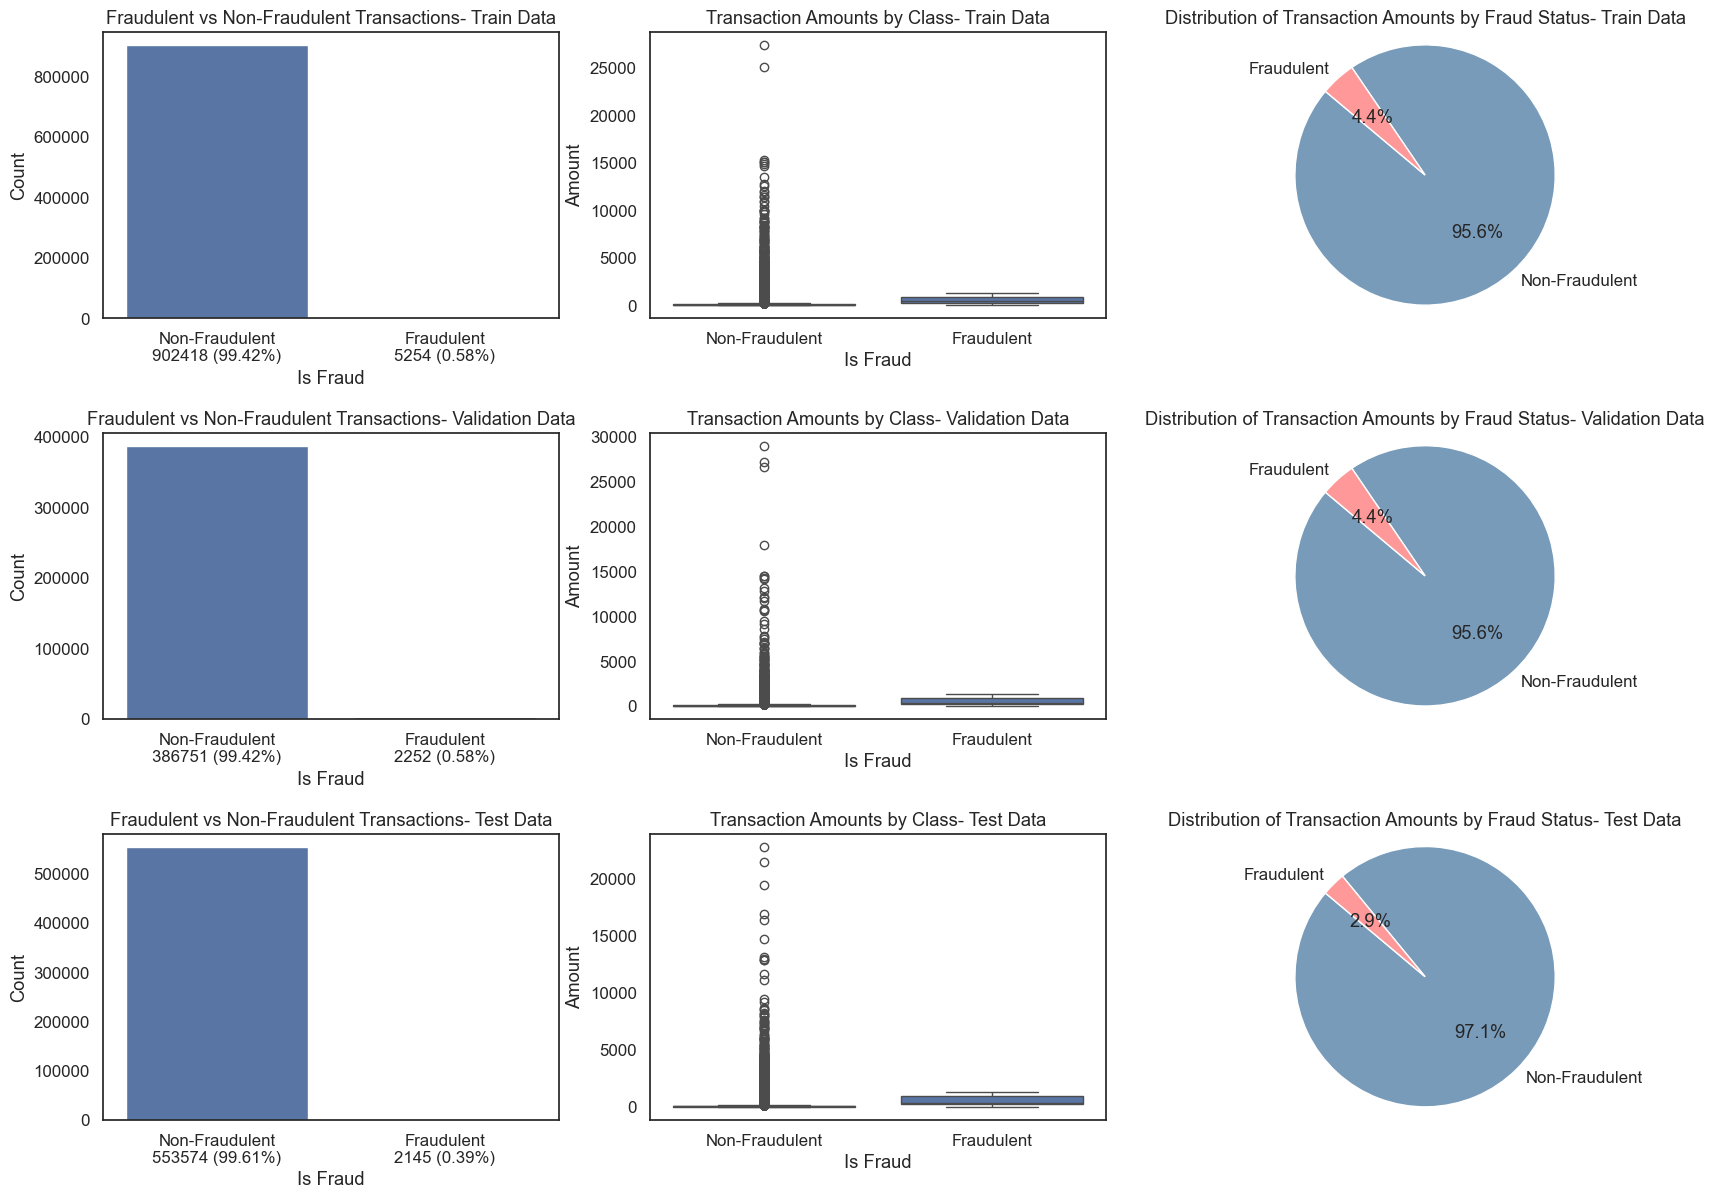

In [220]:
#***************************************** EDA on Train Data *****************************************

# Checking the distribution of classes in target variable 'is_fraud'
classes=y_train.value_counts()
normal_share=classes[0]/y_train.count()*100
fraud_share=classes[1]/y_train.count()*100

# Bar plot for the number and percentage of fraudulent vs non-fraudulent transcations 
plt.figure(figsize=(20,17))
plt.subplot(3,3,1)
sns.countplot(x=y_train, data=X_train)
plt.title('Fraudulent vs Non-Fraudulent Transactions- Train Data')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(
	ticks=[0, 1],
	labels=[
		f'Non-Fraudulent\n{classes[0]} ({float(normal_share):.2f}%)',
		f'Fraudulent\n{classes[1]} ({float(fraud_share):.2f}%)'
	]
)

# Boxplot of transaction amount by class
plt.subplot(3,3,2)
sns.boxplot(x=y_train, y='amt', data=X_train)
plt.title('Transaction Amounts by Class- Train Data')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])

# Create a piechart to observe the distribution of classes with Amount
plt.subplot(3,3,3)
amounts = [
	X_train.loc[y_train == 0, 'amt'].sum(),
	X_train.loc[y_train == 1, 'amt'].sum()
]
labels = ['Non-Fraudulent', 'Fraudulent']
colors = ["#0647808A",'#ff9999']
plt.pie(amounts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Amounts by Fraud Status- Train Data')
plt.axis('equal')

#***************************************** EDA on Validation Data *****************************************

# Checking the distribution of classes in target variable 'is_fraud'
classes=y_val.value_counts()
normal_share=classes[0]/y_val.count()*100
fraud_share=classes[1]/y_val.count()*100

# Bar plot for the number and percentage of fraudulent vs non-fraudulent transcations 
plt.subplot(3,3,4)
sns.countplot(x=y_val, data=X_val)
plt.title('Fraudulent vs Non-Fraudulent Transactions- Validation Data')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(
	ticks=[0, 1],
	labels=[
		f'Non-Fraudulent\n{classes[0]} ({float(normal_share):.2f}%)',
		f'Fraudulent\n{classes[1]} ({float(fraud_share):.2f}%)'
	]
)

# Boxplot of transaction amount by class
plt.subplot(3,3,5)
sns.boxplot(x=y_val, y='amt', data=X_val)
plt.title('Transaction Amounts by Class- Validation Data')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])

# Create a piechart to observe the distribution of classes with Amount
plt.subplot(3,3,6)
amounts = [
	X_val.loc[y_val == 0, 'amt'].sum(),
	X_val.loc[y_val == 1, 'amt'].sum()
]
labels = ['Non-Fraudulent', 'Fraudulent']
colors = ["#0647808A",'#ff9999']
plt.pie(amounts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Amounts by Fraud Status- Validation Data')
plt.axis('equal')

#***************************************** EDA on Test Data *****************************************

# Checking the distribution of classes in target variable 'is_fraud'
classes=y_test.value_counts()
normal_share=classes[0]/y_test.count()*100
fraud_share=classes[1]/y_test.count()*100

# Bar plot for the number and percentage of fraudulent vs non-fraudulent transcations 
plt.subplot(3,3,7)
sns.countplot(x=y_test, data=X_test)
plt.title('Fraudulent vs Non-Fraudulent Transactions- Test Data')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(
	ticks=[0, 1],
	labels=[
		f'Non-Fraudulent\n{classes[0]} ({float(normal_share):.2f}%)',
		f'Fraudulent\n{classes[1]} ({float(fraud_share):.2f}%)'
	]
)

# Boxplot of transaction amount by class
plt.subplot(3,3,8)
sns.boxplot(x=y_test, y='amt', data=X_test)
plt.title('Transaction Amounts by Class- Test Data')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])

# Create a piechart to observe the distribution of classes with Amount
plt.subplot(3,3,9)
amounts = [
	abs(X_test.loc[y_test == 0, 'amt'].sum()),
	abs(X_test.loc[y_test == 1, 'amt'].sum())
]
labels = ['Non-Fraudulent', 'Fraudulent']
colors = ["#0647808A",'#ff9999']
plt.pie(amounts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Amounts by Fraud Status- Test Data')
plt.axis('equal')

plt.subplots_adjust(hspace=0.4, top=0.75)
plt.show()

#### **4.2** Analyze skewness in data in Train, Validation and Test data

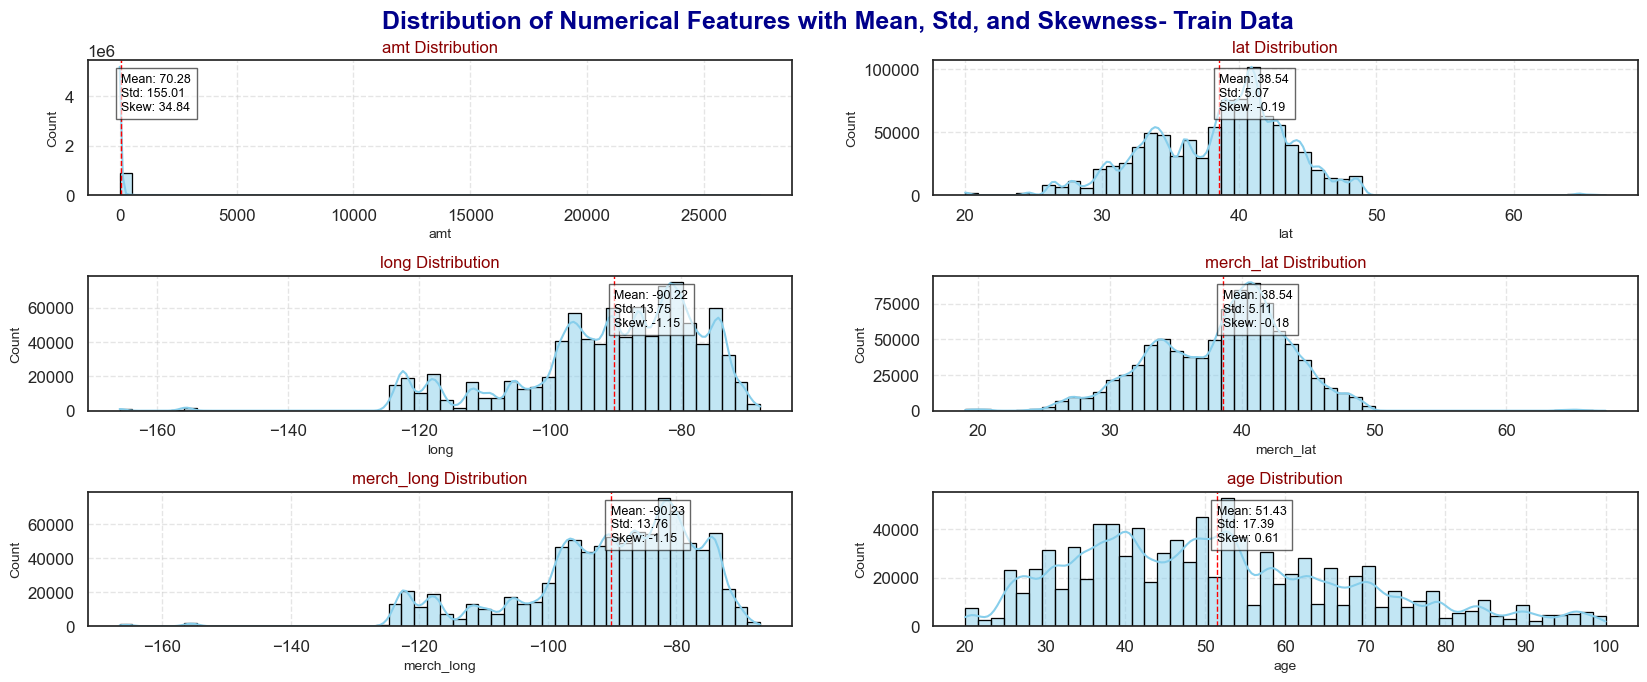

In [221]:
from scipy.stats import skew

# Select numerical columns
num_vars =[]
for cols in X_train.columns:
    if X_train[cols].dtype==np.int64 or X_train[cols].dtype==np.float64:
        num_vars.append(cols)

# Plot all the numerical columns to understand their distribution

plt.figure(figsize=(20,17))
plt.suptitle("Distribution of Numerical Features with Mean, Std, and Skewness- Train Data\n",fontsize=18, color="darkblue", weight='bold')

for i, feature in enumerate(num_vars,1):
    ax = plt.subplot(7,2,i)
    sns.histplot(X_train[feature], kde=True, bins=50, color='skyblue', edgecolor='black', ax=ax)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Mean and Std
    mean_val = X_train[feature].mean()
    std_val = X_train[feature].std()
    skew_val = skew(X_train[feature].dropna())  # drop NaNs if any

    # Add mean line
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)

    # Display stats
    stats_text = f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}"
    ax.text(mean_val, ax.get_ylim()[1]*0.9, stats_text,
            color='black', fontsize=9, verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    
    # Set title and labels
    ax.set_title(f"{feature} Distribution", fontsize=12, color="darkred")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    
# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=0.95)
plt.show()

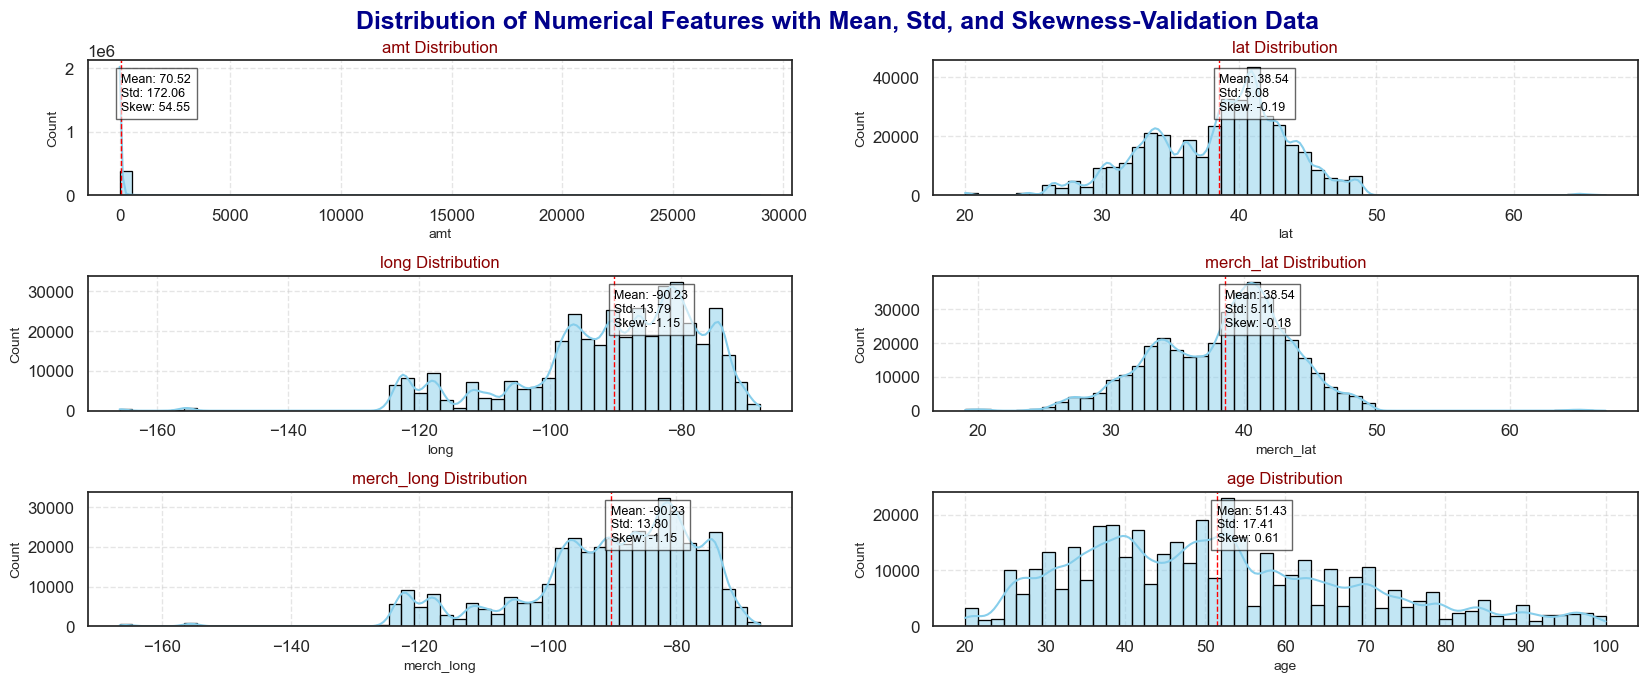

In [222]:
# Select numerical columns
num_vars =[]
for cols in X_val.columns:
    if X_val[cols].dtype==np.int64 or X_train[cols].dtype==np.float64:
        num_vars.append(cols)

# Plot all the numerical columns to understand their distribution

plt.figure(figsize=(20,17))
plt.suptitle("Distribution of Numerical Features with Mean, Std, and Skewness-Validation Data\n",fontsize=18, color="darkblue", weight='bold')

for i, feature in enumerate(num_vars,1):
    ax = plt.subplot(7,2,i)
    sns.histplot(X_val[feature], kde=True, bins=50, color='skyblue', edgecolor='black', ax=ax)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Mean and Std
    mean_val = X_val[feature].mean()
    std_val = X_val[feature].std()
    skew_val = skew(X_val[feature].dropna())  # drop NaNs if any

    # Add mean line
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)

    # Display stats
    stats_text = f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}"
    ax.text(mean_val, ax.get_ylim()[1]*0.9, stats_text,
            color='black', fontsize=9, verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    
    # Set title and labels
    ax.set_title(f"{feature} Distribution", fontsize=12, color="darkred")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    
# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=0.95)
plt.show()

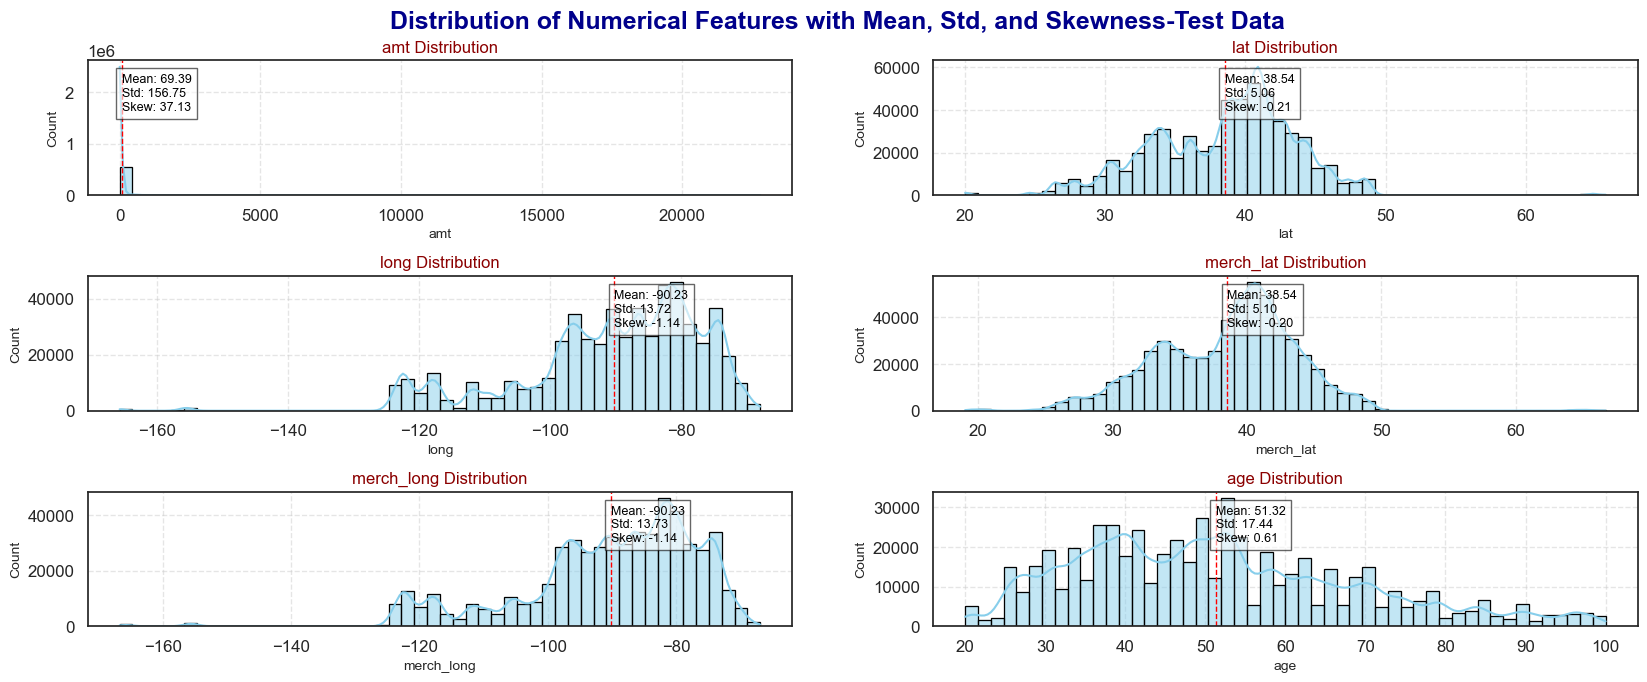

In [223]:
# Select numerical columns
num_vars =[]
for cols in X_test.columns:
    if X_test[cols].dtype==np.int64 or X_train[cols].dtype==np.float64:
        num_vars.append(cols)

# Plot all the numerical columns to understand their distribution

plt.figure(figsize=(20,17))
plt.suptitle("Distribution of Numerical Features with Mean, Std, and Skewness-Test Data\n",fontsize=18, color="darkblue", weight='bold')

for i, feature in enumerate(num_vars,1):
    ax = plt.subplot(7,2,i)
    sns.histplot(X_test[feature], kde=True, bins=50, color='skyblue', edgecolor='black', ax=ax)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Mean and Std
    mean_val = X_test[feature].mean()
    std_val = X_test[feature].std()
    skew_val = skew(X_test[feature].dropna())  # drop NaNs if any

    # Add mean line
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)

    # Display stats
    stats_text = f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}"
    ax.text(mean_val, ax.get_ylim()[1]*0.9, stats_text,
            color='black', fontsize=9, verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    
    # Set title and labels
    ax.set_title(f"{feature} Distribution", fontsize=12, color="darkred")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    
# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=0.95)
plt.show()

### **4.3 Correlation Heatmap for Numerical Features in Train Data and Test Data**

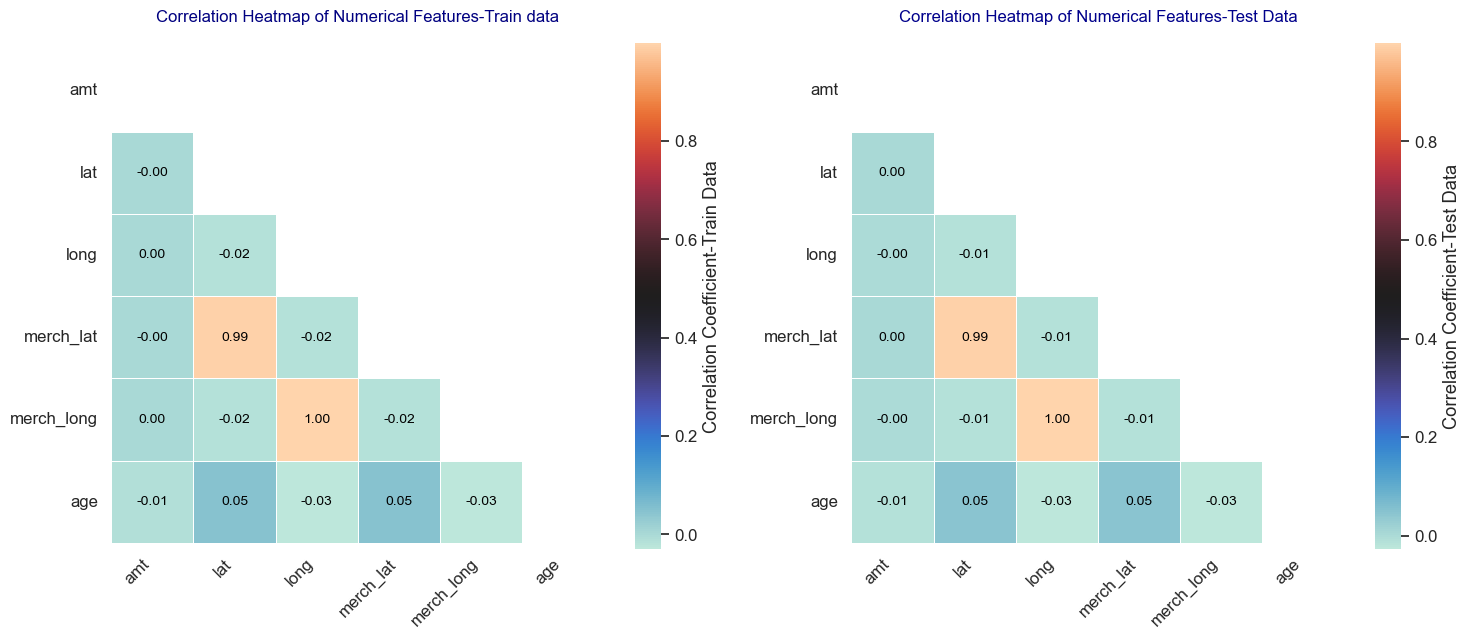

In [224]:
# Select numerical columns present in X_train
num_vars_corr = [col for col in num_vars if col in X_train.columns]

# Compute correlation matrix
num_corr = X_train[num_vars_corr].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(num_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 7))
sns.set(style="white", font_scale=1.1)

# Use a colorblind-friendly diverging palette
cmap = sns.color_palette("icefire", as_cmap=True)

# Draw the heatmap
plt.subplot(1,2,1)
sns.heatmap(
    num_corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    square=True,
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient-Train Data"},
    annot_kws={"size": 10, "color": "black"}
)

# Aesthetic tweaks
plt.title("Correlation Heatmap of Numerical Features-Train data", fontsize=12, color="navy", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

#********************************************************************************************** Test Data **************************************************************************************

# Select numerical columns present in X_test
num_vars_corr = [col for col in num_vars if col in X_test.columns]

# Compute correlation matrix
num_corr = X_test[num_vars_corr].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(num_corr, dtype=bool))

## Use a colorblind-friendly diverging palette
cmap = sns.color_palette("icefire", as_cmap=True)

# Draw the heatmap
plt.subplot(1,2,2)
sns.heatmap(
    num_corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    square=True,
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient-Test Data"},
    annot_kws={"size": 10, "color": "black"}
)

# Aesthetic tweaks
plt.title("Correlation Heatmap of Numerical Features-Test Data", fontsize=12, color="darkblue", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### **4.4.1 Performing Univariate and muti-variate analysis on Train Data**

/var/folders/zl/tt1fz3p16170rt36fh7kplcw0000gn/T/ipykernel_1483/4217363995.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fraud_times, x='trans_time', y='fraud_count', palette='Reds_r')


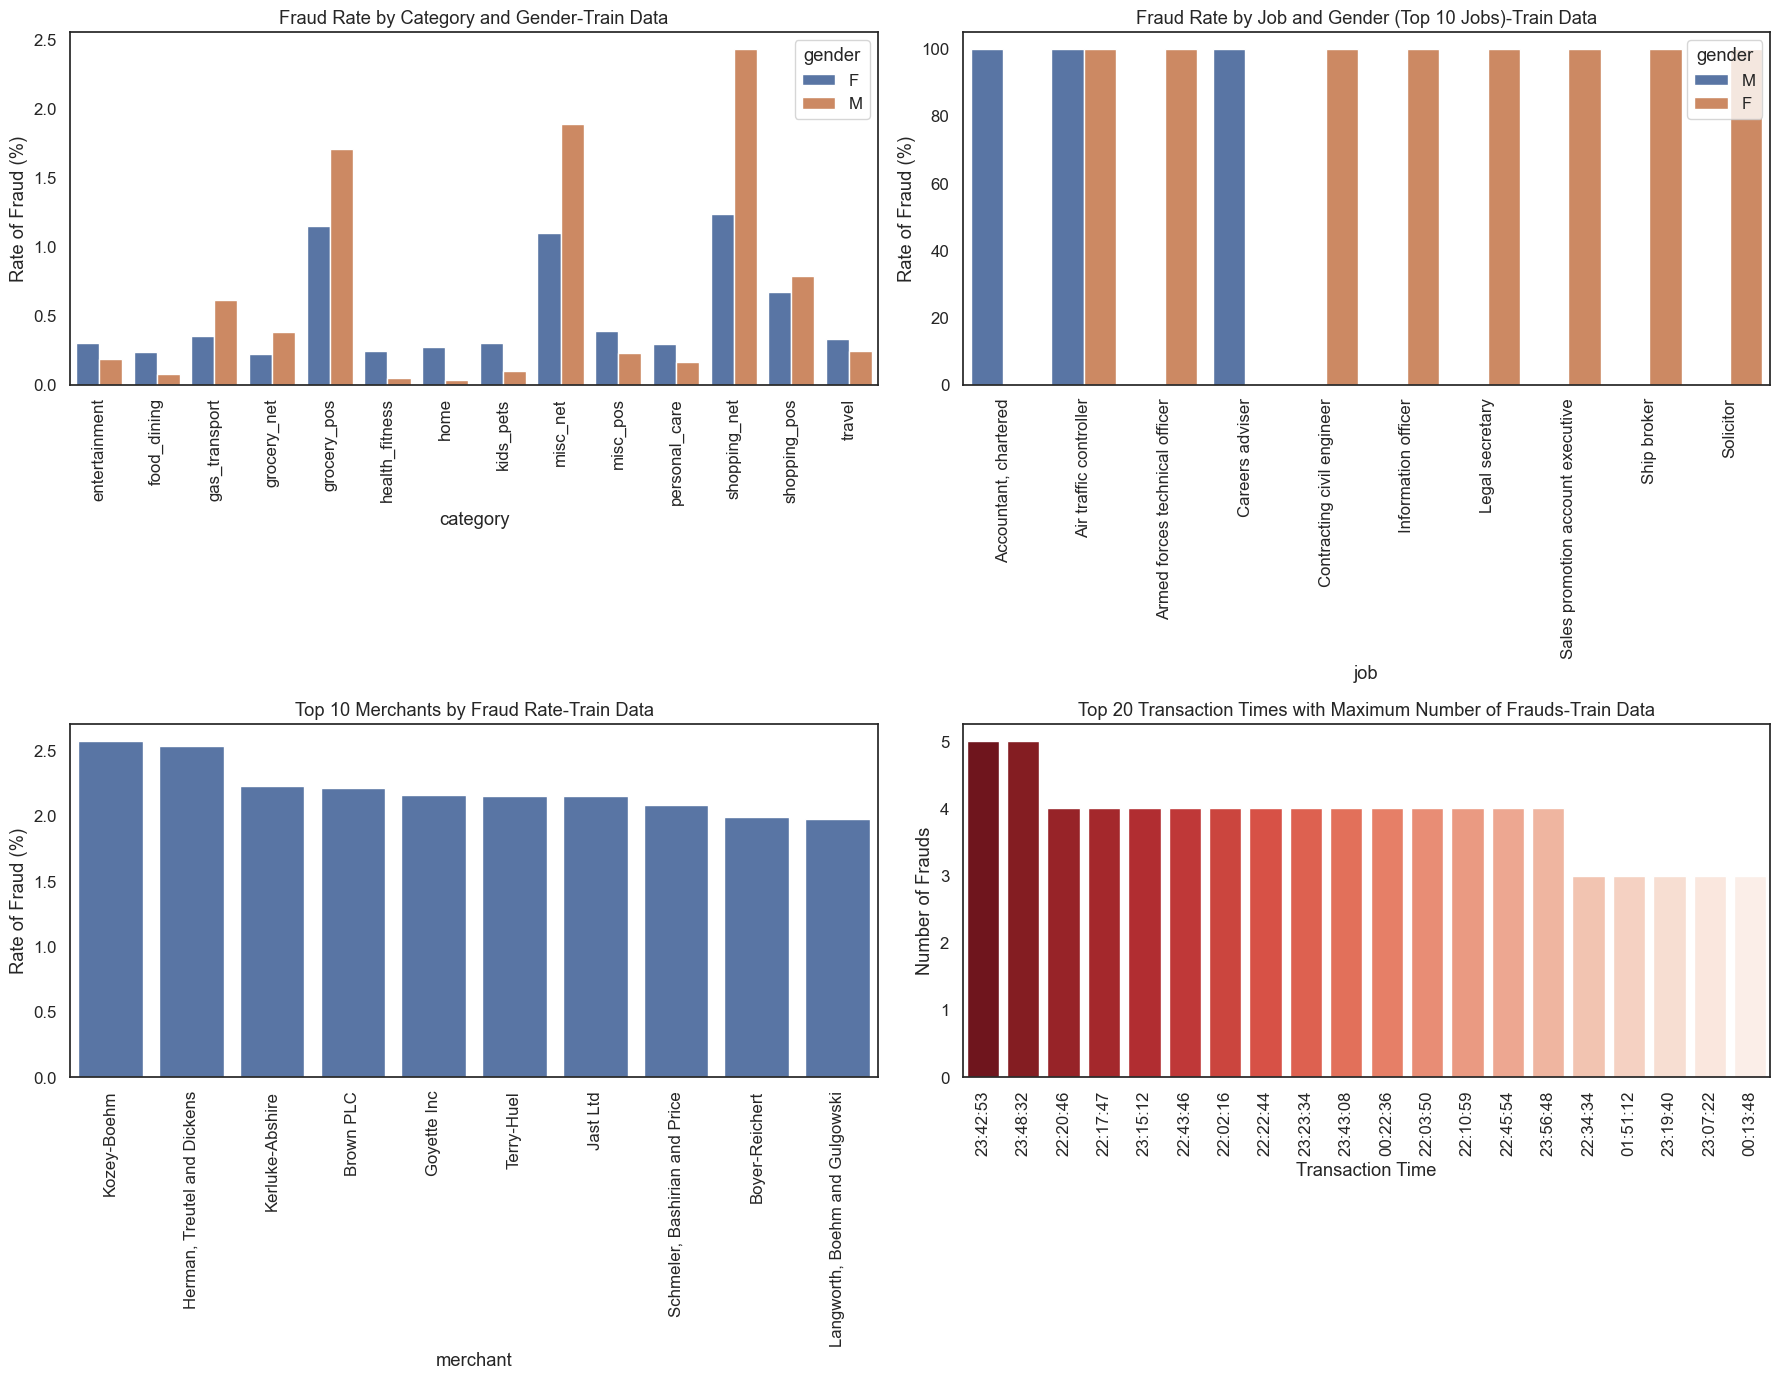

<Figure size 640x480 with 0 Axes>

In [225]:
# Let's find how category and gender determine if the transaction is a fraud or not
fraud_grouped = Train_df_drop.groupby(['category', 'gender'])['is_fraud'].mean().reset_index()
fraud_grouped['is_fraud'] = fraud_grouped['is_fraud'] * 100 

plt.figure(figsize=(18, 14))
plt.subplot(2,2,1)
sns.barplot(data=fraud_grouped, x='category', y='is_fraud', hue='gender')
plt.ylabel('Rate of Fraud (%)')
plt.title('Fraud Rate by Category and Gender-Train Data')
plt.xticks(rotation=90)

# Now, how job and gender determine if the transaction is a fraud or not
fraud_job_grouped = Train_df_drop.groupby(['job', 'gender'])['is_fraud'].mean().reset_index()
fraud_job_grouped['is_fraud'] = fraud_job_grouped['is_fraud'] * 100  

# For better visualization, show only top 10 jobs with highest fraud rate (average over genders)
top_jobs = fraud_job_grouped.groupby('job')['is_fraud'].mean().sort_values(ascending=False).head(10).index
fraud_job_top = fraud_job_grouped[fraud_job_grouped['job'].isin(top_jobs)]

plt.subplot(2,2,2)
sns.barplot(data=fraud_job_top, x='job', y='is_fraud', hue='gender')
plt.ylabel('Rate of Fraud (%)')
plt.title('Fraud Rate by Job and Gender (Top 10 Jobs)-Train Data')
plt.xticks(rotation=90) 

# Finding count of frauds by merchant
fraud_merchant_grouped = Train_df_drop.groupby('merchant')['is_fraud'].mean().reset_index()
fraud_merchant_grouped['is_fraud'] = fraud_merchant_grouped['is_fraud'] * 100  

# For better visualization, show only top 10 merchants with highest fraud rate
top_merchants = fraud_merchant_grouped.sort_values(by='is_fraud', ascending=False).head(10)
plt.subplot(2,2,3)
sns.barplot(data=top_merchants, x='merchant', y='is_fraud')
plt.ylabel('Rate of Fraud (%)')
plt.title('Top 10 Merchants by Fraud Rate-Train Data')
plt.xticks(rotation=90) 

# Find top 20 transaction date/times with the highest number of frauds
top_fraud_times = (
    Train_df_drop[Train_df_drop['is_fraud'] == 1]
    .groupby('trans_time')
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='fraud_count')
)

plt.subplot(2,2,4)
sns.barplot(data=top_fraud_times, x='trans_time', y='fraud_count', palette='Reds_r')
plt.ylabel('Number of Frauds')
plt.xlabel('Transaction Time')
plt.title('Top 20 Transaction Times with Maximum Number of Frauds-Train Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=1.50)
plt.tight_layout()
plt.show()

### **4.4.2 Performing Univariate and muti-variate analysis on Test Data**

/var/folders/zl/tt1fz3p16170rt36fh7kplcw0000gn/T/ipykernel_1483/2619848513.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Test_df_drop[Train_df_drop['is_fraud'] == 1]
/var/folders/zl/tt1fz3p16170rt36fh7kplcw0000gn/T/ipykernel_1483/2619848513.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fraud_times, x='trans_time', y='fraud_count', palette='Reds_r')


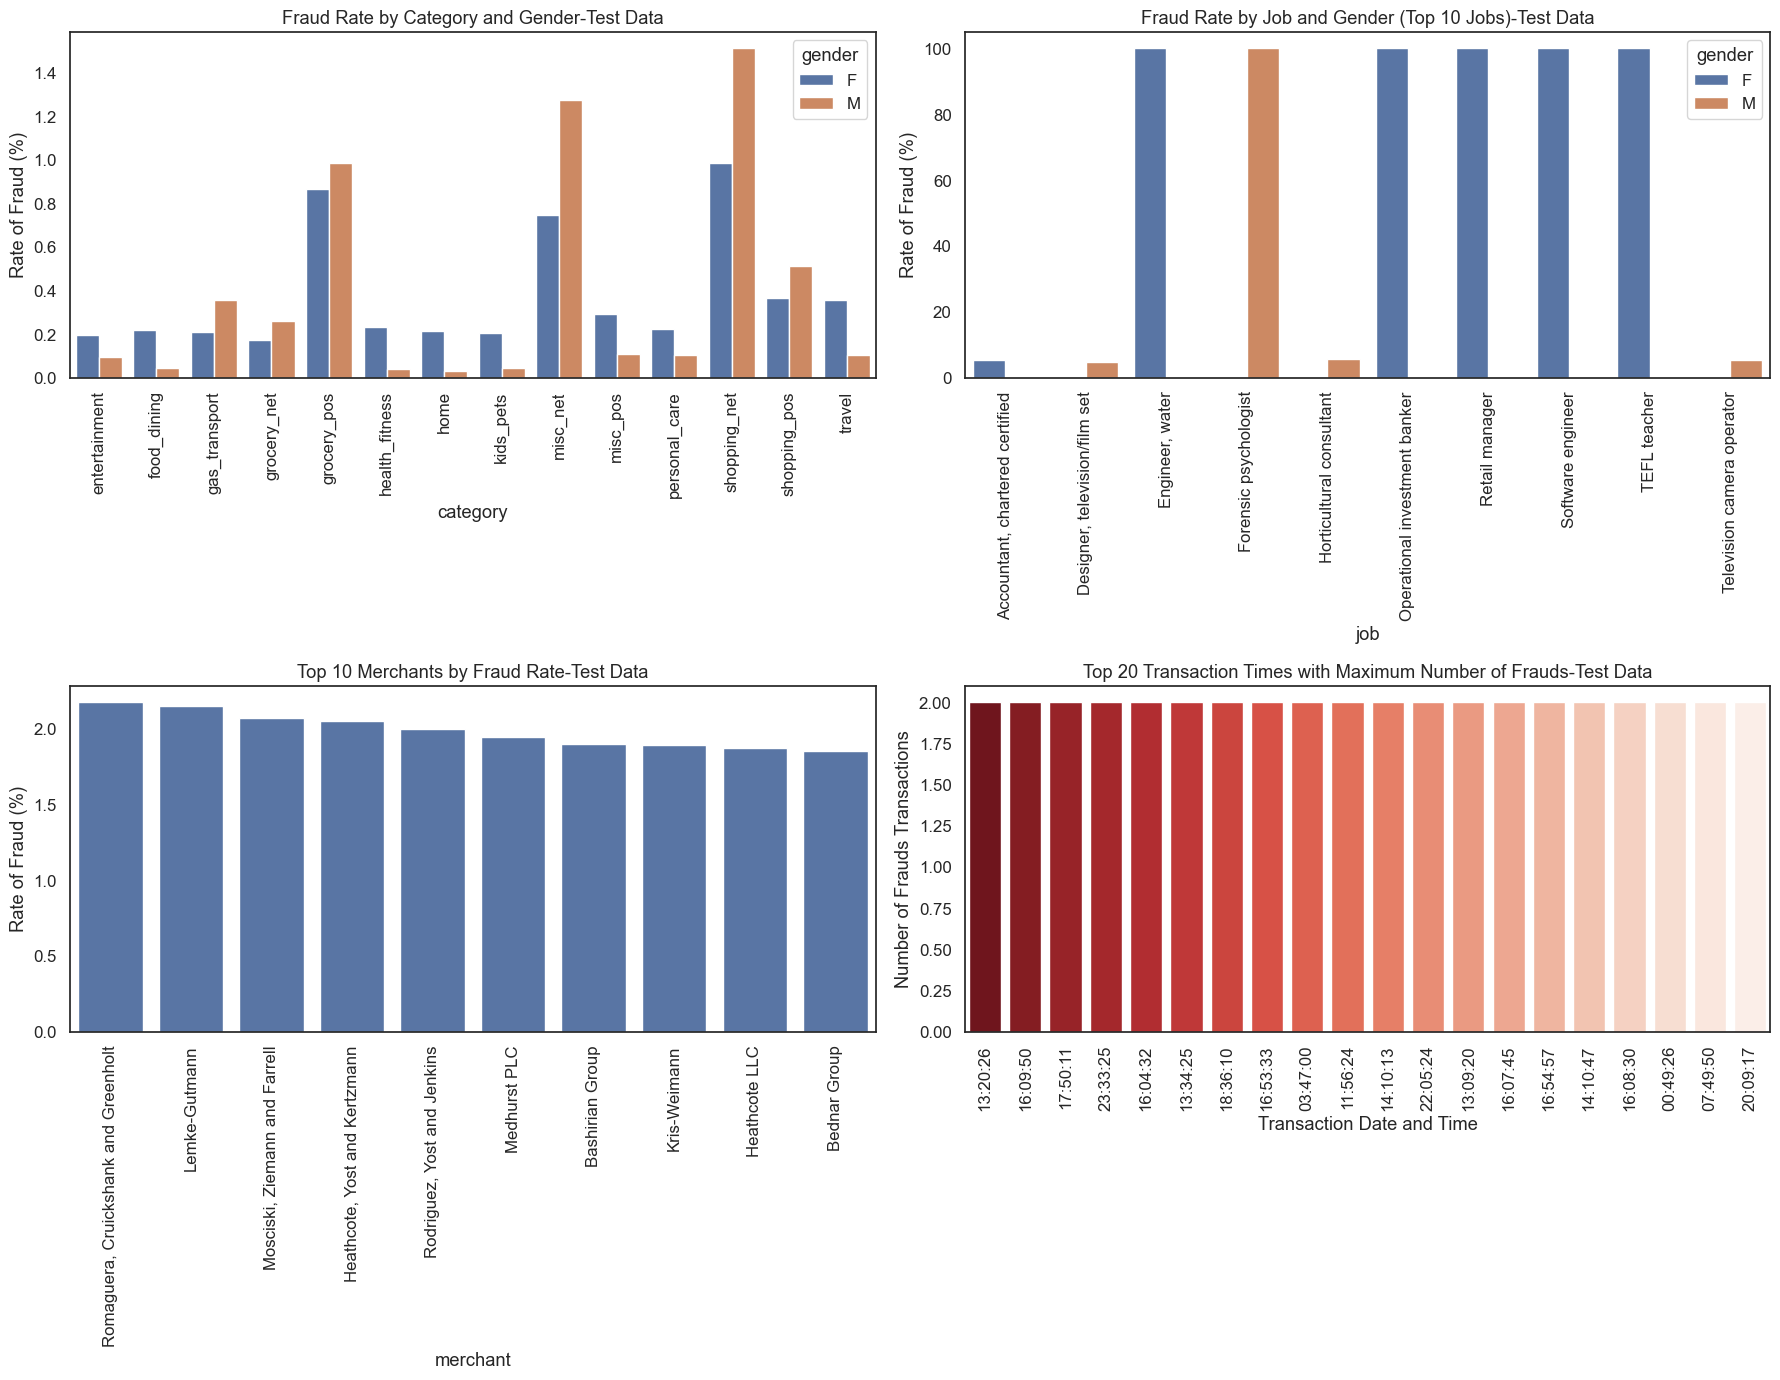

<Figure size 640x480 with 0 Axes>

In [226]:
# Let's find how category and gender determine if the transaction is a fraud or not
fraud_grouped = Test_df_drop.groupby(['category', 'gender'])['is_fraud'].mean().reset_index()
fraud_grouped['is_fraud'] = fraud_grouped['is_fraud'] * 100 

plt.figure(figsize=(18, 14))
plt.subplot(2,2,1)
sns.barplot(data=fraud_grouped, x='category', y='is_fraud', hue='gender')
plt.ylabel('Rate of Fraud (%)')
plt.title('Fraud Rate by Category and Gender-Test Data')
plt.xticks(rotation=90)

# Now, how job and gender determine if the transaction is a fraud or not
fraud_job_grouped = Test_df_drop.groupby(['job', 'gender'])['is_fraud'].mean().reset_index()
fraud_job_grouped['is_fraud'] = fraud_job_grouped['is_fraud'] * 100  

# For better visualization, show only top 10 jobs with highest fraud rate (average over genders)
top_jobs = fraud_job_grouped.groupby('job')['is_fraud'].mean().sort_values(ascending=False).head(10).index
fraud_job_top = fraud_job_grouped[fraud_job_grouped['job'].isin(top_jobs)]

plt.subplot(2,2,2)
sns.barplot(data=fraud_job_top, x='job', y='is_fraud', hue='gender')
plt.ylabel('Rate of Fraud (%)')
plt.title('Fraud Rate by Job and Gender (Top 10 Jobs)-Test Data')
plt.xticks(rotation=90) 

# Finding count of frauds by merchant
fraud_merchant_grouped = Test_df_drop.groupby('merchant')['is_fraud'].mean().reset_index()
fraud_merchant_grouped['is_fraud'] = fraud_merchant_grouped['is_fraud'] * 100  

# For better visualization, show only top 10 merchants with highest fraud rate
top_merchants = fraud_merchant_grouped.sort_values(by='is_fraud', ascending=False).head(10)
plt.subplot(2,2,3)
sns.barplot(data=top_merchants, x='merchant', y='is_fraud')
plt.ylabel('Rate of Fraud (%)')
plt.title('Top 10 Merchants by Fraud Rate-Test Data')
plt.xticks(rotation=90) 

# Find top 20 transaction date/times with the highest number of frauds
top_fraud_times = (
    Test_df_drop[Train_df_drop['is_fraud'] == 1]
    .groupby('trans_time')
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='fraud_count')
)

plt.subplot(2,2,4)
sns.barplot(data=top_fraud_times, x='trans_time', y='fraud_count', palette='Reds_r')
plt.ylabel('Number of Frauds Transactions')
plt.xlabel('Transaction Date and Time')
plt.title('Top 20 Transaction Times with Maximum Number of Frauds-Test Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=1.50)
plt.tight_layout()
plt.show()


### **4.4.3 Finding Safe Transaction time on both Train and Test Data**

/var/folders/zl/tt1fz3p16170rt36fh7kplcw0000gn/T/ipykernel_1483/2681057456.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_Non_fraud_times_Train, x='trans_time', y='fraud_count', palette='Blues')
/var/folders/zl/tt1fz3p16170rt36fh7kplcw0000gn/T/ipykernel_1483/2681057456.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Test_df_drop[Train_df_drop['is_fraud'] == 0]
/var/folders/zl/tt1fz3p16170rt36fh7kplcw0000gn/T/ipykernel_1483/2681057456.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_Non_fraud_times_Test, x='trans_time', y='fraud_count', palette='Blues')


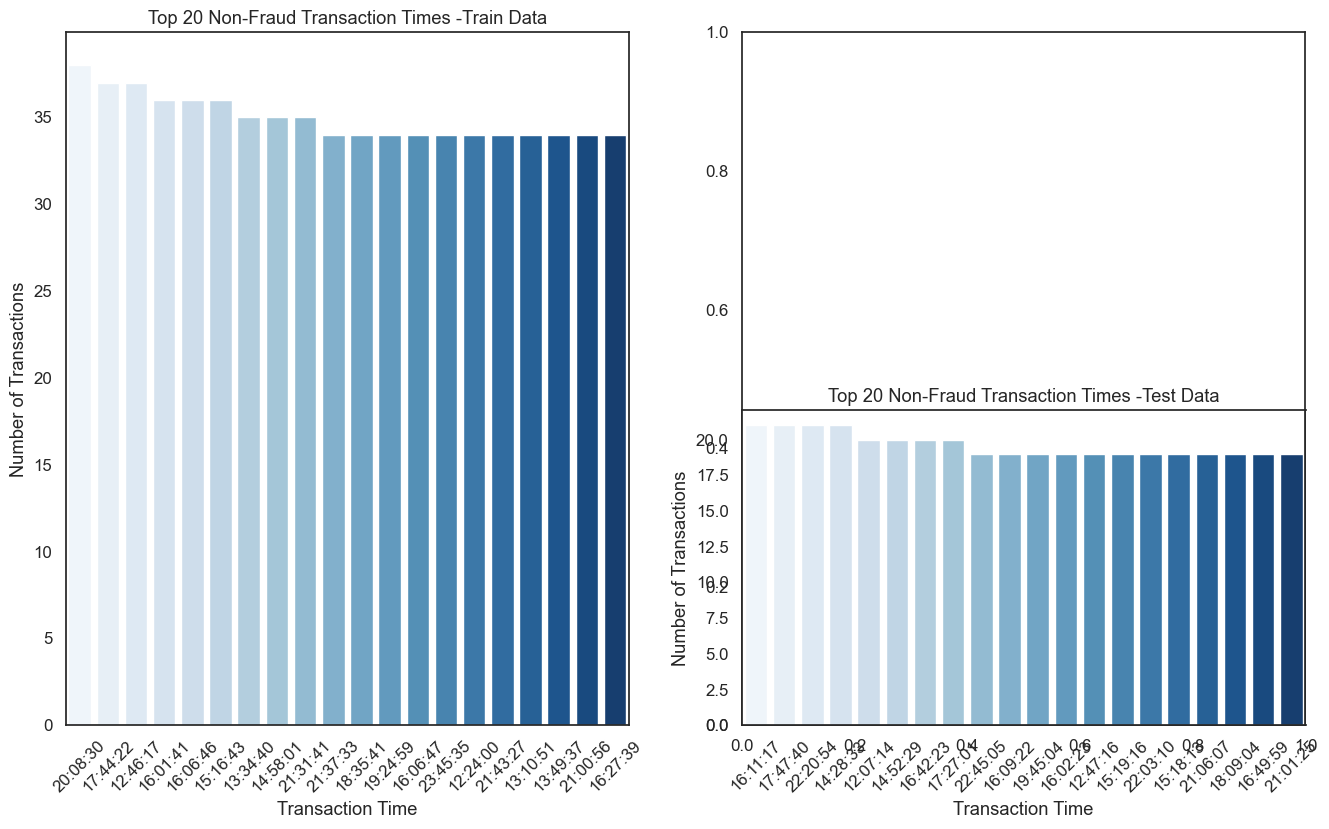

In [227]:
# Find top 20 Non-Fraud transaction times 

# Train Data
top_Non_fraud_times_Train = (
    Train_df_drop[Train_df_drop['is_fraud'] == 0]
    .groupby('trans_time')
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='fraud_count')
)
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.barplot(data=top_Non_fraud_times_Train, x='trans_time', y='fraud_count', palette='Blues')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Time')
plt.title('Top 20 Non-Fraud Transaction Times -Train Data')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
# Test Data
top_Non_fraud_times_Test= (
    Test_df_drop[Train_df_drop['is_fraud'] == 0]
    .groupby('trans_time')
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='fraud_count')
)

plt.subplot(2,2,4)
sns.barplot(data=top_Non_fraud_times_Test, x='trans_time', y='fraud_count', palette='Blues')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Time')
plt.title('Top 20 Non-Fraud Transaction Times -Test Data')
plt.xticks(rotation=45)

# Adjust spacing
#plt.tight_layout()
plt.show()


### Questions of CBA- Using Train Data alone

In [228]:
# Calculate required metrics
# 1. Average number of transactions per month
avg_transactions_per_month = Train_df_drop['trans_mnth'].value_counts().mean()

# 2. Average number of fraudulent transactions per month
avg_fraud_transactions_per_month = Train_df_drop[Train_df_drop['is_fraud'] == 1]['trans_mnth'].value_counts().mean()

# 3. Average amount per fraud transaction
avg_amount_per_fraud_transaction = Train_df_drop[Train_df_drop['is_fraud'] == 1]['amt'].mean()

# Create DataFrame
summary_df = pd.DataFrame({
    'Metric': [
        'Average number of transactions per month',
        'Average number of fraudulent transactions per month',
        'Average amount per fraud transaction'
    ],
    'Value': [
        round(avg_transactions_per_month,2),
        round(avg_fraud_transactions_per_month,2),
        round(avg_amount_per_fraud_transaction,2)
    ]
})

# Print
print(summary_df)

                                              Metric      Value
0           Average number of transactions per month  108056.25
1  Average number of fraudulent transactions per ...     625.50
2               Average amount per fraud transaction     531.32


## **5.0 Data Preprocessing before Model Building**

### **5.1 Handling Skeweness in Train , Validation and Test data**

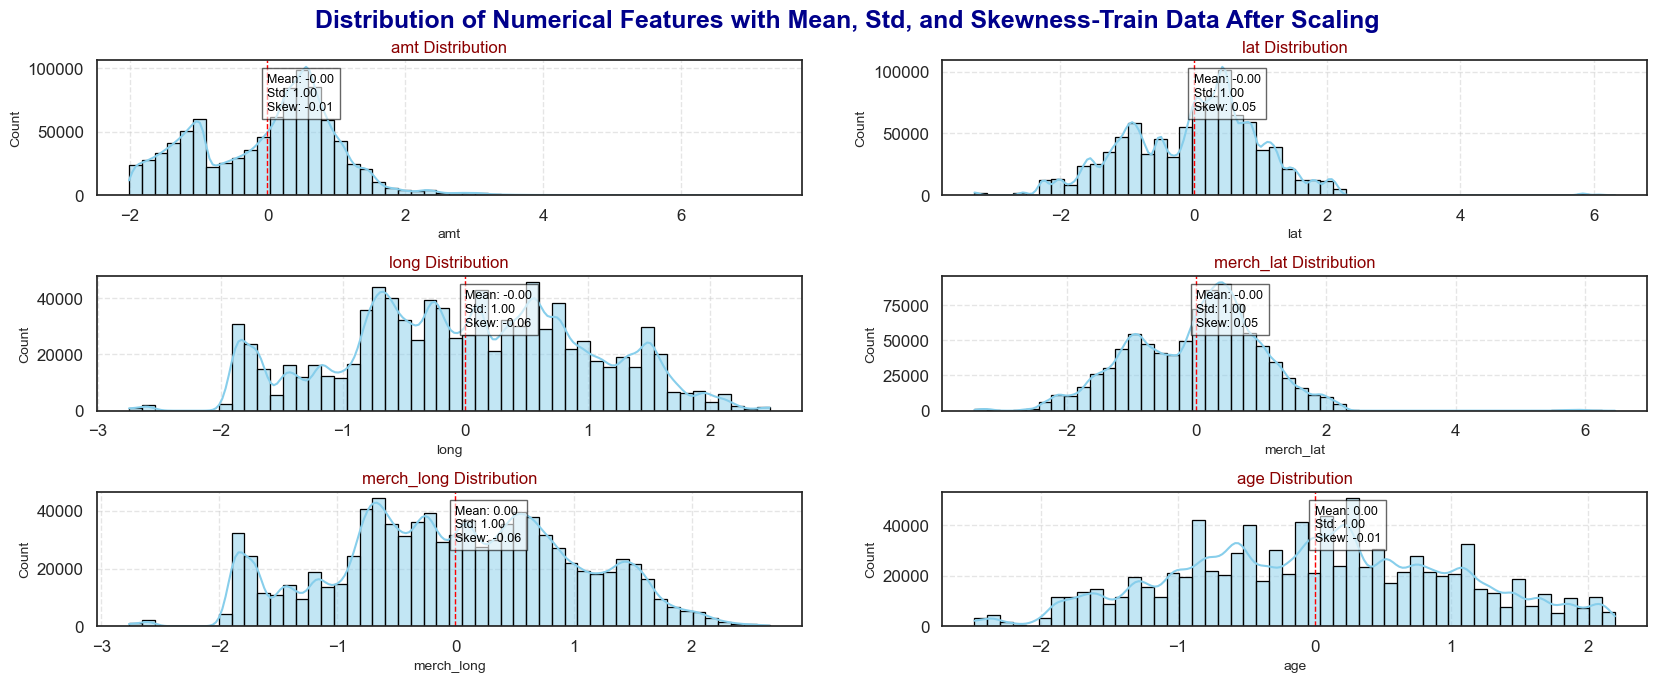

In [229]:
# Remove 'is_fraud' from num_vars if present, since it's not a feature column
num_vars_no_target = [col for col in num_vars if col != 'is_fraud']

# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
scaler = preprocessing.PowerTransformer(copy=False)
X_train[num_vars_no_target] = scaler.fit_transform(X_train[num_vars_no_target])
X_val[num_vars_no_target] = scaler.transform(X_val[num_vars_no_target])
X_test[num_vars_no_target] = scaler.transform(X_test[num_vars_no_target])

# verifying the transformation by plotting the distribution of numerical features again after scaling
plt.figure(figsize=(20,17))
plt.suptitle("Distribution of Numerical Features with Mean, Std, and Skewness-Train Data After Scaling\n",fontsize=18, color="darkblue", weight='bold')
for i, feature in enumerate(num_vars_no_target, 1):
    ax = plt.subplot(7,2,i)
    sns.histplot(X_train[feature], kde=True, bins=50, color='skyblue', edgecolor='black', ax=ax)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Mean and Std
    mean_val = X_train[feature].mean()
    std_val = X_train[feature].std()
    skew_val = skew(X_train[feature].dropna())  # drop NaNs if any

    # Add mean line
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)

    # Display stats
    stats_text = f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}"
    ax.text(mean_val, ax.get_ylim()[1]*0.9, stats_text,
            color='black', fontsize=9, verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    
    # Set title and labels
    ax.set_title(f"{feature} Distribution", fontsize=12, color="darkred")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=0.95)
plt.show()


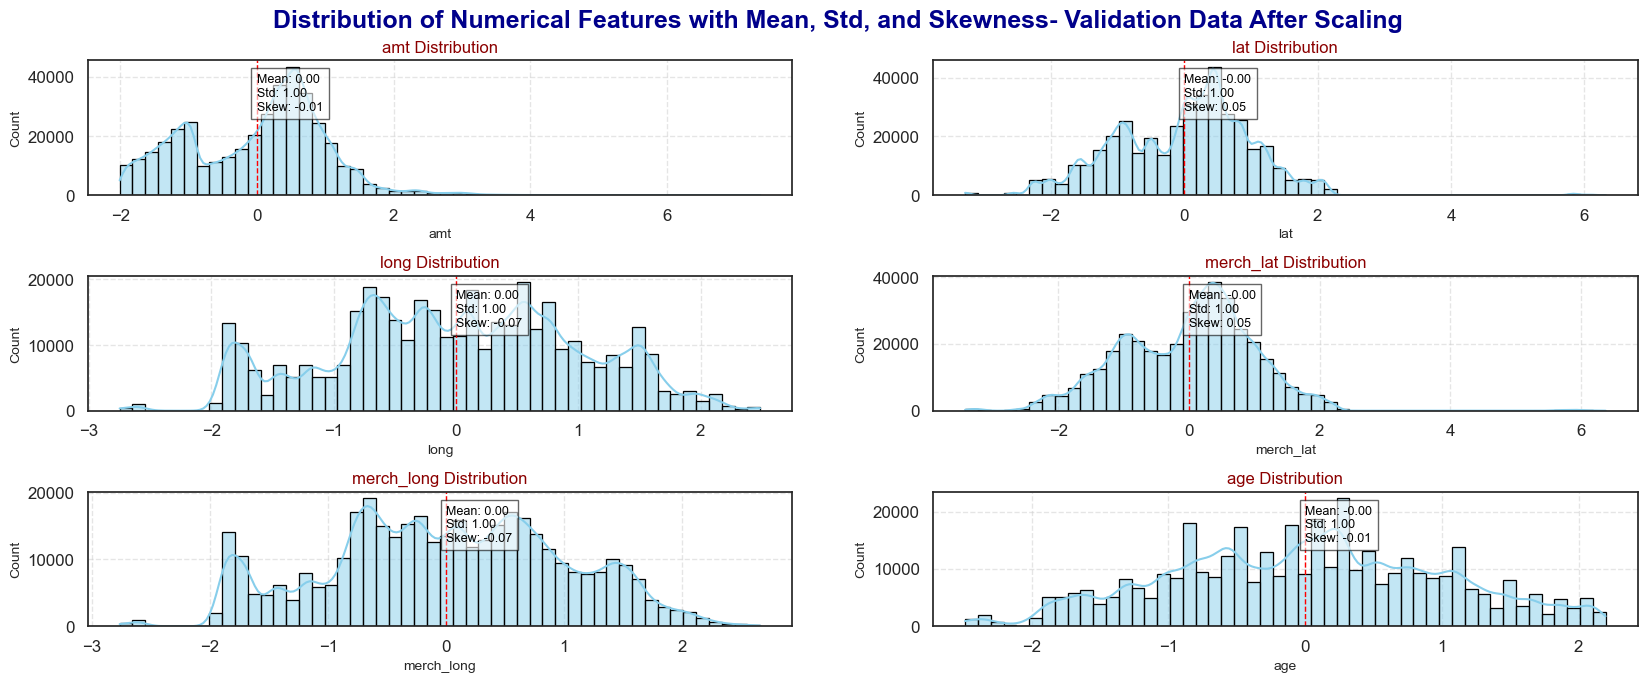

In [230]:
# verifying the transformation by plotting the distribution of numerical features again after scaling- Validation Data
plt.figure(figsize=(20,17))
plt.suptitle("Distribution of Numerical Features with Mean, Std, and Skewness- Validation Data After Scaling\n",fontsize=18, color="darkblue", weight='bold')
for i, feature in enumerate(num_vars_no_target, 1):
    ax = plt.subplot(7,2,i)
    sns.histplot(X_val[feature], kde=True, bins=50, color='skyblue', edgecolor='black', ax=ax)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Mean and Std
    mean_val = X_val[feature].mean()
    std_val = X_val[feature].std()
    skew_val = skew(X_val[feature].dropna())  # drop NaNs if any

    # Add mean line
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)

    # Display stats
    stats_text = f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}"
    ax.text(mean_val, ax.get_ylim()[1]*0.9, stats_text,
            color='black', fontsize=9, verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    
    # Set title and labels
    ax.set_title(f"{feature} Distribution", fontsize=12, color="darkred")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=0.95)
plt.show()

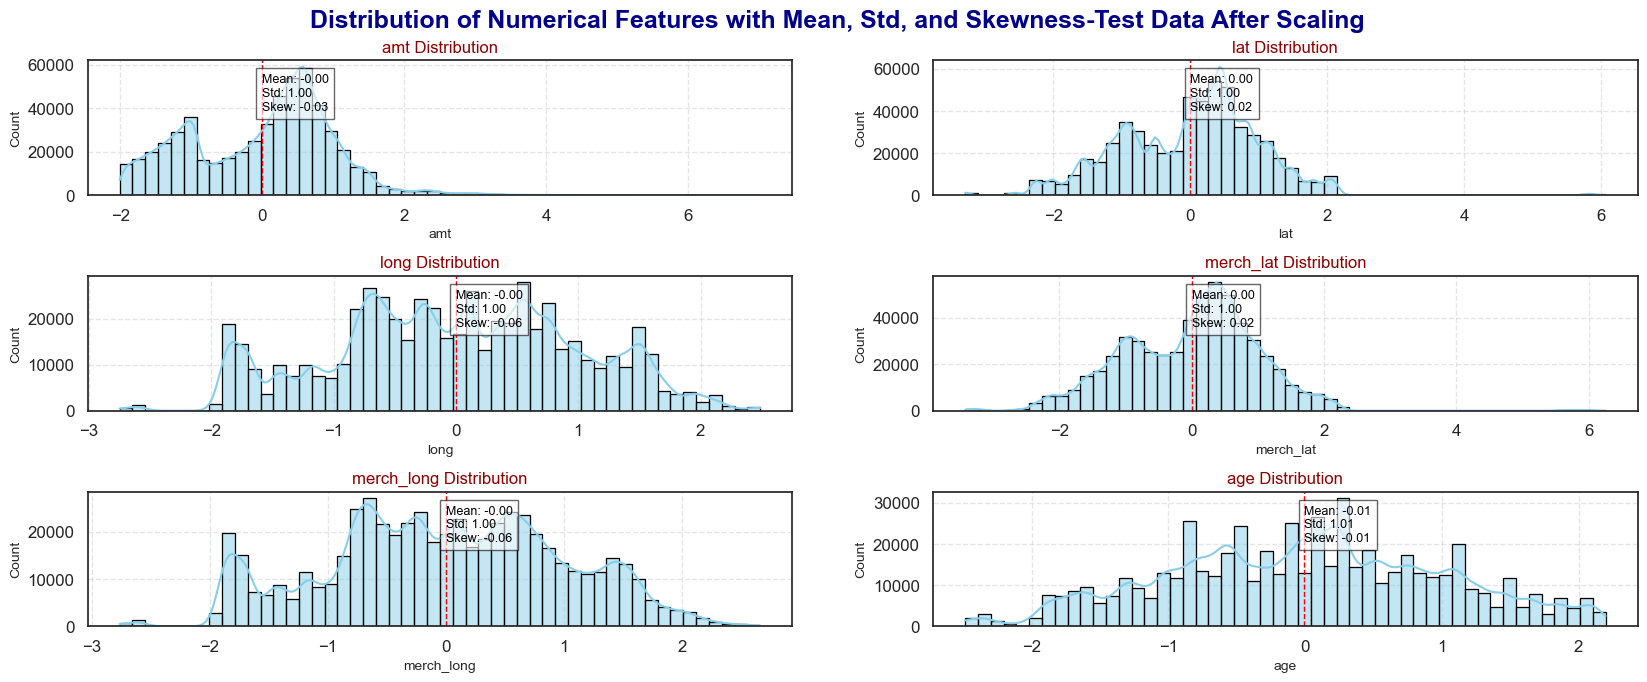

In [231]:
# verifying the transformation by plotting the distribution of numerical features again after scaling- Test Data
plt.figure(figsize=(20,17))
plt.suptitle("Distribution of Numerical Features with Mean, Std, and Skewness-Test Data After Scaling\n",fontsize=18, color="darkblue", weight='bold')
for i, feature in enumerate(num_vars_no_target, 1):
    ax = plt.subplot(7,2,i)
    sns.histplot(X_test[feature], kde=True, bins=50, color='skyblue', edgecolor='black', ax=ax)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Mean and Std
    mean_val = X_test[feature].mean()
    std_val = X_test[feature].std()
    skew_val = skew(X_test[feature].dropna())  # drop NaNs if any

    # Add mean line
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)

    # Display stats
    stats_text = f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}"
    ax.text(mean_val, ax.get_ylim()[1]*0.9, stats_text,
            color='black', fontsize=9, verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.6))
    
    # Set title and labels
    ax.set_title(f"{feature} Distribution", fontsize=12, color="darkred")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
# Adjust spacing
plt.subplots_adjust(hspace=0.6, top=0.95)
plt.show()

### **5.2 Data Scaling**

In [232]:
# Applying Mean Encoding to categorical features- Train Data
data1 = X_train.copy()
for col in X_train.columns:
    if data1[col].dtype == 'object':
        mean_encoded = data1.groupby(col)['amt'].mean()
        data1[col] = data1[col].map(mean_encoded)   
        print(f"Applied Mean Encoding to column- Train Data: {col}")
X_train = data1.copy()
# Applying Mean Encoding to categorical features- Validation Data
data2 = X_val.copy()
for col in X_val.columns:
    if data2[col].dtype == 'object':
        mean_encoded = data2.groupby(col)['amt'].mean()
        data2[col] = data2[col].map(mean_encoded)   
        print(f"Applied Mean Encoding to column-Val Data: {col}")
X_val = data2.copy()
# Applying Mean Encoding to categorical features- Test Data
data3 = X_test.copy()
for col in X_test.columns:        
    if data3[col].dtype == 'object':
        mean_encoded = data3.groupby(col)['amt'].mean()
        data3[col] = data3[col].map(mean_encoded)   
        print(f"Applied Mean Encoding to column-Test Data: {col}")
X_test = data3.copy()


Applied Mean Encoding to column- Train Data: merchant
Applied Mean Encoding to column- Train Data: category
Applied Mean Encoding to column- Train Data: gender
Applied Mean Encoding to column- Train Data: city
Applied Mean Encoding to column- Train Data: state
Applied Mean Encoding to column- Train Data: job
Applied Mean Encoding to column- Train Data: trans_date
Applied Mean Encoding to column- Train Data: trans_time
Applied Mean Encoding to column- Train Data: cust_name
Applied Mean Encoding to column-Val Data: merchant
Applied Mean Encoding to column-Val Data: category
Applied Mean Encoding to column-Val Data: gender
Applied Mean Encoding to column-Val Data: city
Applied Mean Encoding to column-Val Data: state
Applied Mean Encoding to column-Val Data: job
Applied Mean Encoding to column-Val Data: trans_date
Applied Mean Encoding to column-Val Data: trans_time
Applied Mean Encoding to column-Val Data: cust_name
Applied Mean Encoding to column-Test Data: merchant
Applied Mean Encoding

In [233]:
# Checking the shape of both train and test data after feature engineering
print("Train Data has",X_train.shape[0], "rows and", X_train.shape[1],"columns after feature engineering\n")
print(X_train.columns)
print("\nValidation Data has", X_val.shape[0], "rows and", X_val.shape[1], "columns after feature engineering\n")
print(X_val.columns)
print("\nTest Data has", X_test.shape[0], "rows and", X_test.shape[1], "columns after feature engineering\n")
print(Test_df_drop.columns) 

Train Data has 907672 rows and 16 columns after feature engineering

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'lat', 'long',
       'job', 'merch_lat', 'merch_long', 'trans_date', 'trans_time',
       'cust_name', 'age', 'trans_mnth'],
      dtype='object')

Validation Data has 389003 rows and 16 columns after feature engineering

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'lat', 'long',
       'job', 'merch_lat', 'merch_long', 'trans_date', 'trans_time',
       'cust_name', 'age', 'trans_mnth'],
      dtype='object')

Test Data has 555719 rows and 16 columns after feature engineering

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'lat', 'long',
       'job', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date',
       'trans_time', 'cust_name', 'age', 'trans_mnth'],
      dtype='object')


### **5.3 Handling data imbalance**

In [236]:
# Applying SMOTE to handle class imbalance in the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) 
X_val_res, y_val_res = smote.fit_resample(X_val, y_val)
X_test_res, y_test_res = smote.fit_resample(X_test, y_test)

# Checking the distribution of classes in target variable 'is_fraud' before and after SMOTE
print("Train Data - Before SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("Train Data - Before SMOTE, counts of label '0': {} \n".format(sum(y_train==0)))
print("Train Data - After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("Train Data - After SMOTE, counts of label '0': {}".format(sum(y_train_res==0))) 
print("\nValidation Data - Before SMOTE, counts of label '1': {}".format(sum(y_val==1)))
print("Validation Data - Before SMOTE, counts of label '0': {} \n".format(sum(y_val==0)))
print("Validation Data - After SMOTE, counts of label '1': {}".format(sum(y_val_res==1)))
print("Validation Data - After SMOTE, counts of label '0': {}".format(sum(y_val_res==0))) 
print("\nTest Data - Before SMOTE, counts of label '1': {}".format(sum(y_test==1))) 
print("Test Data - Before SMOTE, counts of label '0': {} \n".format(sum(y_test==0)))
print("Test Data - After SMOTE, counts of label '1': {}".format(sum(y_test_res==1)))
print("Test Data - After SMOTE, counts of label '0': {}".format(sum(y_test_res==0)))
  


Train Data - Before SMOTE, counts of label '1': 5254
Train Data - Before SMOTE, counts of label '0': 902418 

Train Data - After SMOTE, counts of label '1': 902418
Train Data - After SMOTE, counts of label '0': 902418

Validation Data - Before SMOTE, counts of label '1': 2252
Validation Data - Before SMOTE, counts of label '0': 386751 

Validation Data - After SMOTE, counts of label '1': 386751
Validation Data - After SMOTE, counts of label '0': 386751

Test Data - Before SMOTE, counts of label '1': 2145
Test Data - Before SMOTE, counts of label '0': 553574 

Test Data - After SMOTE, counts of label '1': 553574
Test Data - After SMOTE, counts of label '0': 553574


## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

SyntaxError: invalid syntax (2912211727.py, line 5)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

## MLFlow Tracking code

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 19.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18/18 [mlflow]17/18 [mlflow]skinny]]pi]


In [ ]:
model_pipe.get_params()

In [ ]:
X_test.join(y_test)

In [ ]:
# set the uri for server
mlflow.set_tracking_uri(("http://127.0.0.1:8888")
mlflow.set_experiment("00_Fraud Detection CaseStudy")

with mlflow.start_run() as run:
    # log the data signature
    data_signature = mlflow.models.infer_signature(model_input=X_train,model_output=model_pipe.predict(X_train))

    # log preprocessor parameters
    mlflow.log_params(model_pipe.get_params())

    # log model metrics
    mlflow.log_metrics(metrics)
    
    # log the model
    mlflow.sklearn.log_model(sk_model=model_pipe,artifact_path="model.pkl",signature=data_signature)

    # Get the model uri
    model_uri = mlflow.get_artifact_uri("model.pkl")
    
    # # evaluate the model
    # evaluations = mlflow.models.evaluate(model=model_uri,
    #                        data=X_test.join(y_test),
    #                        targets='survived',
    #                        model_type="classifier")

    # log the confusion matrix
    mlflow.log_figure(cm.figure_,artifact_file='confusion_matrix.png')